In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim
import numpy as np
import folium
from folium.plugins import MarkerCluster

In [7]:
df = pd.read_csv('place_info_final.csv')
df

,name,address,rating,latitude,longitude,close,open,district,store_chain
0,Violet Pham,"197 Đ. Xuân Thủy, Dịch Vọng Hậu, Cầu Giấy, Hà Nội",4.3,21.036423,105.784302,8 PM,8 AM,Cầu Giấy,Other
1,OVmart - Lê Trọng Tấn,"220 P. Lê Trọng Tấn, Định Công, Thanh Xuân, Hà...",4.4,20.991840,105.832637,10 PM,8 AM,Thanh Xuân,Other
2,Mẹ và Bé,"121 P. Chùa Quỳnh, Bạch Mai, Hai Bà Trưng, Hà Nội",5.0,20.999551,105.853609,11:59 PM,0:00 AM,Hai Bà Trưng,Mẹ và Bé
3,Baby Kid,"214 P. Nguyễn Ngọc Nại, Khương Mai, Thanh Xuân...",3.0,20.996934,105.826858,9:30 PM,8 AM,Thanh Xuân,Other
4,Nana's House - Siêu thị Mẹ và Bé,"117K1 P. Giảng Võ, Chợ Dừa, Đống Đa, Hà Nội , ...",3.9,21.026878,105.824006,9:30 PM,8 AM,Đống Đa,Mẹ và Bé
...,...,...,...,...,...,...,...,...,...
139,KidsPlaza Store Support Office,"C, TT9-6, Khu nhà ở Him Lam, Hà Đông, Hà Nội",4.0,20.979877,105.767599,8 AM,8 AM,Hà Đông,KidsPlaza
140,KidsPlaza - Combo đồ sơ sinh mùa hè bé trai bé...,"Tòa Nhà HH2 Bắc Hà, P. Tố Hữu, Trung Văn, Nam ...",4.9,20.997874,105.795412,10 PM,8 AM,Nam Từ Liêm,KidsPlaza
141,KidsPlaza Kiot 4 - 6 tầng 1 HH03A Khu ĐT Thanh...,"Kiot 4 - 6 tầng 1 HH03A Khu ĐT Thanh, Hà Đông,...",5.0,20.955835,105.756366,10 PM,8 AM,Hà Đông,KidsPlaza
142,KidsPlaza,"100-A12, Tôn Thất Tùng, Quận Đống Đa, Thành Ph...",5.0,21.005910,105.831146,9:30 PM,8 AM,Đống Đa,KidsPlaza


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         144 non-null    object 
 1   address      144 non-null    object 
 2   rating       144 non-null    float64
 3   latitude     144 non-null    float64
 4   longitude    144 non-null    float64
 5   close        144 non-null    object 
 6   open         144 non-null    object 
 7   district     144 non-null    object 
 8   store_chain  144 non-null    object 
dtypes: float64(3), object(6)
memory usage: 10.3+ KB


In [4]:
df.describe()

,rating,latitude,longitude
count,144.000000,144.000000,144.000000
mean,3.725000,21.013704,105.811900
std,1.102667,0.030971,0.043532
min,1.000000,20.936045,105.610710
25%,3.375000,20.993782,105.787752
50%,4.000000,21.012806,105.809209
75%,4.400000,21.035131,105.831333
max,5.000000,21.088096,105.950561


# Phân tích chung

C:\Users\HP\AppData\Local\Temp\ipykernel_10116\1643364910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_counts.index, x=district_counts.values, palette='viridis')


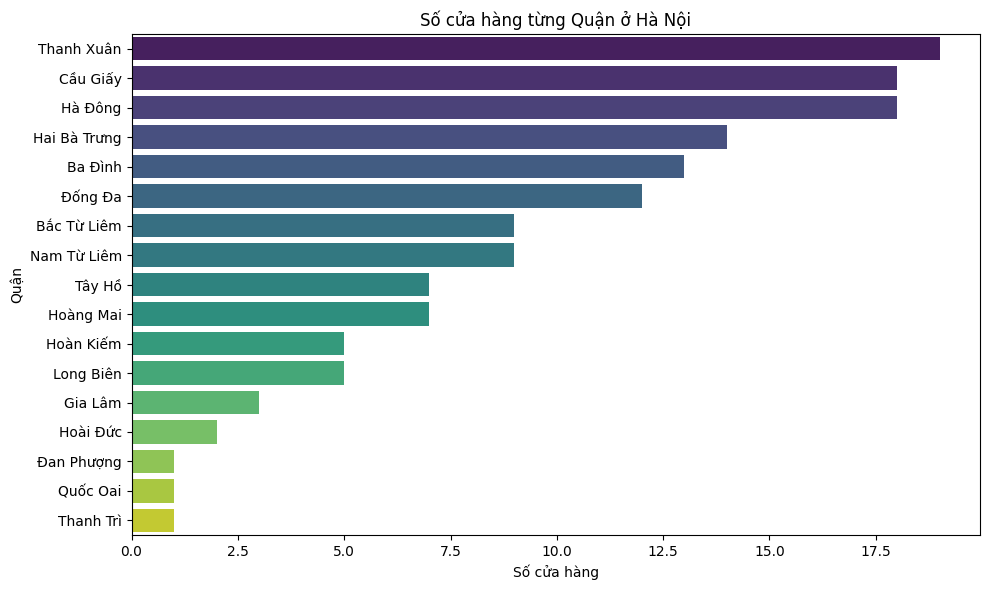

In [8]:
district_counts = df['district'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=district_counts.index, x=district_counts.values, palette='viridis')

plt.xlabel('Số cửa hàng')
plt.ylabel('Quận')
plt.title('Số cửa hàng từng Quận ở Hà Nội')
plt.tight_layout()

plt.show()

In [63]:
df1 = df.copy()

In [9]:
open_hours_distribution = df['open'].value_counts()
close_hours_distribution = df['close'].value_counts()

# Hiển thị kết quả
print("Phân bố giờ mở cửa:")
print(open_hours_distribution)

print("\nPhân bố giờ đóng cửa:")
print(close_hours_distribution)

Phân bố giờ mở cửa:
open
8 AM        83
7 AM        35
0:00 AM      9
7:30 AM      8
8:30 AM      3
9 AM         3
10:30 AM     1
6:30 AM      1
7:45 AM      1
Name: count, dtype: int64

Phân bố giờ đóng cửa:
close
10 PM       104
9:30 PM      21
11:59 PM      9
8 AM          3
7 AM          2
8:30 PM       2
8 PM          1
10:30 PM      1
10:15 PM      1
Name: count, dtype: int64


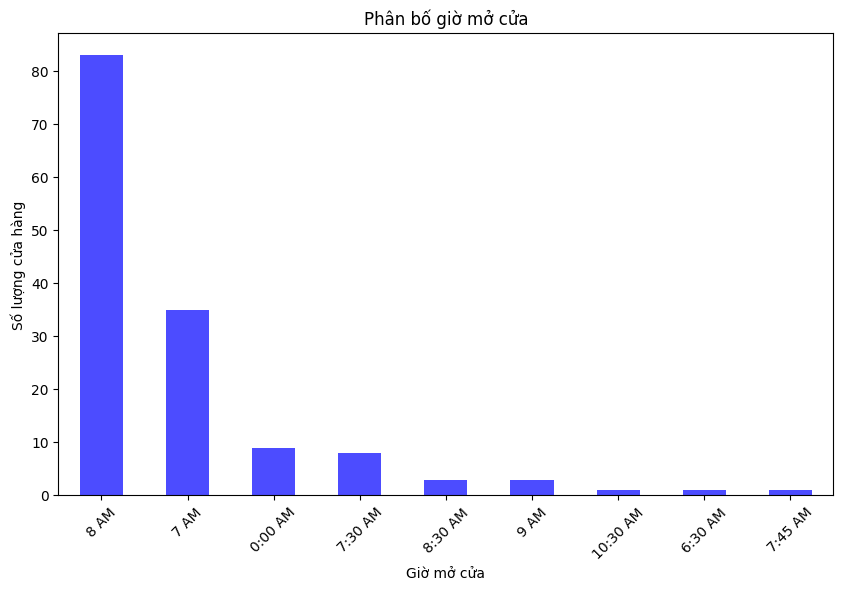

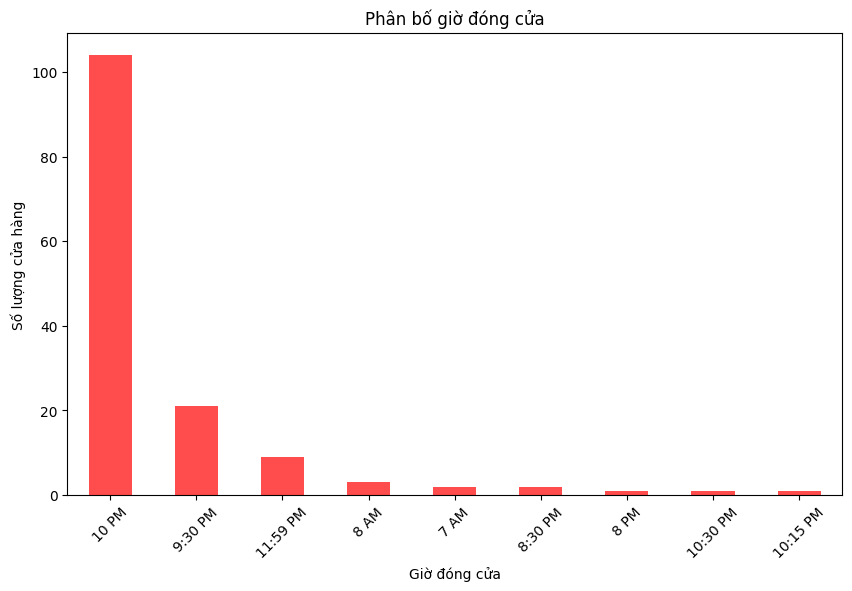

In [10]:
plt.figure(figsize=(10, 6))
open_hours_distribution.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Phân bố giờ mở cửa')
plt.xlabel('Giờ mở cửa')
plt.ylabel('Số lượng cửa hàng')
plt.xticks(rotation=45)
plt.show()

# Vẽ biểu đồ phân bố giờ đóng cửa
plt.figure(figsize=(10, 6))
close_hours_distribution.plot(kind='bar', color='red', alpha=0.7)
plt.title('Phân bố giờ đóng cửa')
plt.xlabel('Giờ đóng cửa')
plt.ylabel('Số lượng cửa hàng')
plt.xticks(rotation=45)
plt.show()

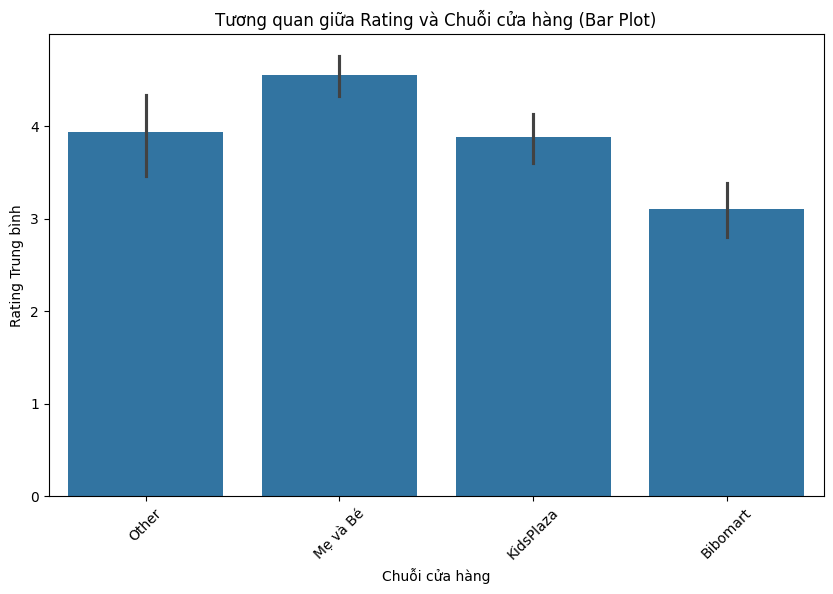

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='store_chain', y='rating', data=df, estimator=np.mean)
plt.title('Tương quan giữa Rating và Chuỗi cửa hàng (Bar Plot)')
plt.xlabel('Chuỗi cửa hàng')
plt.ylabel('Rating Trung bình')
plt.xticks(rotation=45)
plt.show()

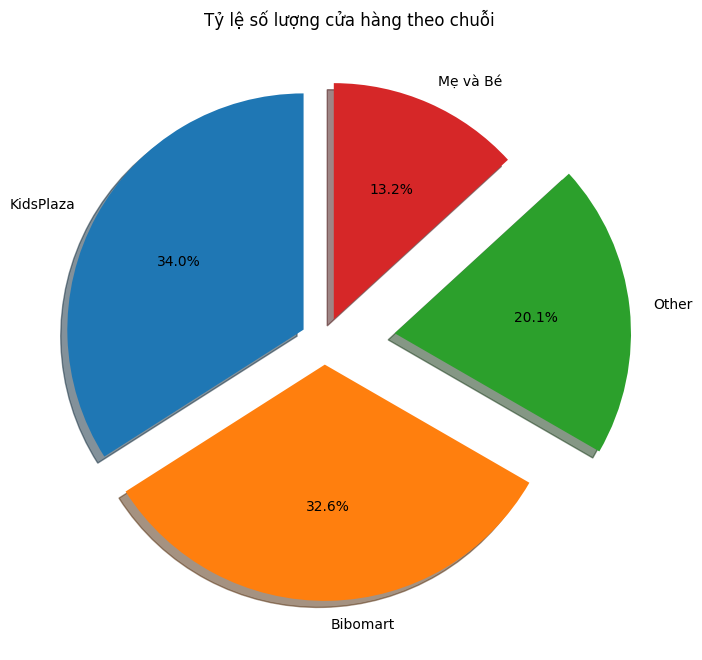

In [12]:
store_chain_counts = df['store_chain'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(store_chain_counts, labels=store_chain_counts.index, 
        autopct='%1.1f%%', startangle=90, explode=(0.1,0.1,0.3,0.1),
        shadow=True)
plt.title('Tỷ lệ số lượng cửa hàng theo chuỗi')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

In [13]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

mymap = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

marker_cluster = MarkerCluster().add_to(mymap)

store_colors = {
    'Mẹ và Bé': 'blue',
    'KidsPlaza': 'green',
    'Bibomart': 'red',
    'Other': 'gray' 
}

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=[row['name'],row['address'],row['rating']],
        icon=folium.Icon(color=store_colors.get(row['store_chain'], 'gray'))
    ).add_to(mymap)
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 160px; 
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     padding: 10px;">
     <b>Legend</b><br>
     <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Mẹ và Bé<br>
     <i class="fa fa-map-marker fa-2x" style="color:green"></i> KidsPlaza<br>
     <i class="fa fa-map-marker fa-2x" style="color:red"></i> Bibomart<br>
     <i class="fa fa-map-marker fa-2x" style="color:gray"></i> Other
</div>
'''
mymap.get_root().html.add_child(folium.Element(legend_html))


In [14]:
mymap

In [40]:
mymap.save("store_map_with_legend.html")